In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=066237b560f057a7a7b1e00fced05a8ddfa1355f71d0eb0618656bac7b808ab2
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import PIL
import requests
from io import BytesIO
import urllib
import numpy as np

24-03-17 10:22:44 - Directory /root/.deepface created
24-03-17 10:22:44 - Directory /root/.deepface/weights created


In [4]:
model = "VGG-Face"

didenegar_pics = ["/content/drive/MyDrive/didenegar/face-1.jpg", "/content/drive/MyDrive/didenegar/face-2.jpg", "/content/drive/MyDrive/didenegar/face-3.jpg"]
zuckerberg_pics = ["https://github.com/serengil/deepface/blob/master/tests/dataset/img14.jpg?raw=true", "https://static01.nyt.com/images/2022/07/01/business/01meta2/merlin_163192371_9fc4ab15-be9f-4429-9a0b-6a0797bb5618-articleLarge.jpg?quality=75&auto=webp&disable=upscale", "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBISFRIREREPEREREhERDw8REREPDxERGBQZGRgUGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QGhISGjQhISE0NDQxNDQxNDQxNDE0NDE0MTE0NDE0NDE0NDQxNDY0MTQ0NDQ0NDQxNDQxNDQ0MTE0NP/AABEIALcBEwMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUGBwj/xABAEAACAQMCAgcFBQUGBwAAAAABAgADBBEhMQUSBiJBUWFxgQcTMpGhI0JSscEzYnKCshRjkqLR8BUWQ1PC4fH/xAAaAQADAQEBAQAAAAAAAAAAAAAAAgMBBAUG/8QAJxEBAQEAAgIBAwQDAQEAAAAAAAECETEDIQQSMkEFIlFxM2GBIxP/2gAMAwEAAhEDEQA/AOWUY8RGKMkERDEpvLOhtK1d5Z28zQh9BLzgtPLCUiTR9H0ywmZ7Gum4sqfVEee3VtxBbLoJI5Z0IqO74Mj9gmd4h0Z3KjE3oWLNENuI2dWNcfrWD0zqDjviVE6ZxLg6sDpMPxThppkkDSZ5dfVlTOlcojVUR9Y1VE5FaRTEkoIxTkhJlLEhBJKCMUxGVWtcO1O3ACp+0qscIGOyjvMzg2fae1yq+PgNZHqcWK5K0+YD97X17pItuh9229xR12BDk59JL/5EvAP2lA9uBzKPPE2Zhrmq+248hxzoyg9q9YS7ta6VBzIwYeEq6nQ68Rv2aVFOhZWAIHfqZW16FW1cKQ1OpuAeqWHdnZuyFzL0zixs1WOKJXcH4itddNHUDnX9RLQCSs4AYhReIXLMAAR1BEqI4qzW0sCNXC9Ux4RFYaGbC1jOML1vWQrUayw4yuvrK+33nTnpG9tJaDQScgkGy2EnrGIDLBFEQQDiVCSSJFoSZjSKrTa7yzt5WoNZZW8zQiQk1vRqnqJklm36L09BNx2NdNfRXQR7ETTEcAlUSQI6giAI8gg2FcmRMr0ltRyk4mtQSm49SypmVs7cwCYJjNYSdWTDMPGRKwnOuZSSacjJJVODCq7kIeX4mIRM/iY4B+uZd8KpLRRUTOF3P3mbtY+JOsz98/L7o/31P9ZpOGFQMuygHvIEy9LeJcWV0QQe6W3/ABDxlZbe6Ozg+OciSqS0zuw+cWLVNp3ue2I4lZ0btDSroGH3X2dD3qeyN+4XdTmQal0UzrGlJqSsda272lcqX5hTc03JOrISMMR5YM2KzD8buwblyu/KA3cx5QBn5TZWVTnRH/Eqn6Rd/ipQ/BmExicybTimPLGFj6TWUsCIqjQxyJqDQzYVkONrrKuhvLbjS6ypo7zqz0jrto7LYSwWQLHYSxUTSFYhReIIBwyhJwGkg0JPG0VSkKNZYUNpA7ZNtzDTYlUxqJ0PozTwo8pgLYZZfOdL6PphB5TcF2vEEcAiFEdUSiYsR1BE4jiCY0tZB4qmVPlJ6xm+TKwDlnEU5XaVtcS949T5XzKOvOfXboz0irvJdMSKu8lUjAFXdDnTQjK1KbYO+OcDP1kO84mKZ5DT587kDOCZPZMsjZOAcEdh1BGfUS1/4YrdZQNdc7TJf5Wzn16V3B3qPUWmAygsAwzkDIzkGL43VqUmbJbkU4yDuZecFohawXcqrNnXAMl3VktTmB311P6w9cn4vDG8L44SCVeovKcEB2O+2m3fNXb3Pv1BOCwA6/4h3yLQ4Iik8yoAT1vs1yfMjeWdG1p0h1Nu7J0heCyX8ua8Q5hUOOYu9TGMZJ6xAUAbzpdlRNNKaHdEVT5ga/WUCUko1MuwR6rOaT8pblXmOAD2E43lrwMELUXrYWq4Ge3bMTdH0ftulkRE4i8wCT5ICiPoI0BHkmspzERU2McEJxpNKyfGhKWnvL7ji7yiTedWPtS120VhsJZLKzh+wloojFLxCi8Q4FcHoSxTaV9HeWCbQUpLSVbmRHMeoNFvTYuOHjLr5zqPBUwg8pzHg65dZ1ThS4QeU3HRNrBRHVEQscAlCweItBEgR1RMBQEKuuVMUIbDQwDnfSilg58Zlq4m66UUdCZia4kN9rZ6QV3kqmJFXeTKUUyTR7c936y+tKg5RKDGh8jHv7S4ReRSxJxgEA59Yti/j1xEtOOJQqurIebOjZ3GOyT7XiqV2yiVUcauWUqjjwmVqrUZuvRbPaeZc/WWNpdV6eooVSCOzlIA+c36Vebw1a3AxqPPMiXDZ227pX292agyQRr2gg/KP0n0Pjt5xeGW+h3FotRFBUsUwowDnHNknJ0HnLShT5VA+fmd41a0eRQOZzgDAZsgeUloImtck1rmcQnlg5Y8BCKxEyFEdQQlEcUTeQUogbaGsUwjQrL8cXeZ4bzS8bXQzNds6sfajrtf8O2EtllRw06CXCRynYIIIFcHT4pYptIGOtJ9PaF9WqGnj1vGakftYtbGi4AmXHpOpcPXqic16Nplx5zp1kOqI2ek9dpSiOLEgRaxmDEdWIAjiiAKAihCAihAM10ipZVpzy5XGZ1HjdPKnynM+IJhmHjJbVwqe2TKUiHeS6UmoloIq2X3bmnUBBIVlz+FhkMPpK+w4oj3lG15kFNqgSpUbOC2uEXxJAXJ7TNb0w4Wz8tal+0QYKjTmTfH5/Mx547xyM7k1wqqtpWJHI4x4mWVtSqIuKjEzNW/GnHVOjDs2b5SSeK1G3P6ROKv9UWNbAJKkBT93xjtmnMV7s6f6yvsqZqMO2X9qmvkNJl9RnKYojyxtRHVnPSFCHiCAQHAARwRAixCAYi4kRUeFrO8bXQzMHeazjY0Myb7zq8fSO+15wvaXKSk4WdJeLHKcggggVwxxrJlPaRnkikdI3knGqf8EOI/bxl4/bydNGv6LJ1hOlWo0E550UTUTotsNBKZ6S12kCKESItYAtY6sbEcWALEOEIoQCDxNMqZzTjdPDtOicb4ta0BivcUKbdiO6K58lzk/Kcp6SdJKDufcc1TfrlSifXU/KJrF10fNkQWGsgcT4qFUpTbLHRnH3R3A9/5SvubupUzzNp+Feqv/v1kBxrGz4uPdbrfPRvxGQRqDsQe+dn6IcZF/bDmYG4o4S4GmWOOrUx3MB8w3dONYlp0c409lXSsuWT4a1Mf9Smdx5jceI7iZVN0XjHRlapJACv+LGh85na3B6lE4dSCO/UEd4PaJ1nh5p16aV6bBqdRQyMO1T+R8OySKvCadRSjqGU9mxB71PYZLXjl6Wz5LPV6c54Cg1wMEDeaShQAps/aKiJ4YKuT/SI3c8Be0flUc6PqjDAyO0N+HHedO3vxfcQs1o2tPrISaiMzKcqzuCoAPaNVA7/WQ1m8VbWpxOPyp1jwjSR0CcoKEPEAEViAEBFgRIEcEAAh4iYoR4WqXjQ0MyL7+s2PGRoZj6m5850+PpLXa24UZfJtM/woy/p7ShDsEEECuHvHKLaRtoqjK+afuNOhuZItjtIzSVaDUSNPG96KptOgWw0Ew3RhdBN1bbCPOk9dnxFiIEWIMLWOLG1jqQA3dUVndlVFBZ3YhVVQMliTsAJx/pZ7Uqjs9GwAp0hzL/aiCa1QbcyA/AN8HU7Hqy09snSE00Th9NiGrD3tyRofdA4RP5mBJ8EHYZx9RNjeEpLnJJOcsSWY5JJO5J7T4x8GQVHjHkeUlZTrRt1zF5h4msMITnBGe5h+sBWKVtSp33HiIorBrf8Asr6Ui3c2Vdj7ms3Nbtq3JXP3AB2N/V/FNv0j4pfVFKWJS03BeqnNcHwA+Fe7OGPcROEqSDkEggggg4II2IPYZ3roZxdOJWqtUCm4pfZ1tNSygdb1GD6+EWyNzfbkS8YruHt7mo7DnJqrUYsXYNu7HLNg95P0l5w+6qizvLUc5ounvramo6tKvQYViU/DnkOQO3XfOV+0vhQoXNOqi49+jM+MBSyFQWPiQRmaD2ZcPp3NOqGYrWoVadSnjLYUrjrBviUlCCNO2SnrTv3xrwfVJx/xl+E9LqyBfeYrIcb6OB4N2+s3PC+J0rheak4OPiQ6OnmP1nMekPB2sLqvakAIrGpb4YsDQYkrqdcgDlOe1TI1tdVKTCojFHXZlOCPDy8Jm/Bnc5z6riz5LO/bs4ihMt0e6VpX5adbCVSQqtsjn/xPhNODOLWNYvFXzqanMOYihEAxYmRtEYBAYc1iq4tsZj6w1PnNpxFMiZqtZanSdHi6S2PhZmgp7SnsbYqZcU9pUh2CDMECuHx2mI0sfSdHnn5bCGj9scaxho6hnLVcTmxruA8WVCATOgcO4mrAaicUpHrTS2F89MDDEjuMn/8ASx7M/Ts+TEs7ddp1Q3bH1nPuH9IcYDHHnNTY8WVsaymdzTzvP8HyeO9LxYpnCgsxCqoLMx2CgZJMjUq4btmY9p3Fxb2FVAwD3JFuo7eRtah/whh/MJRx2WduNdJ+LG9ua9yxOKjn3ancUl6qLjs6oGfEmVQA74flC0HjGAwvjFq2IkGAzQfBigZHD4j4OdY0pbCmTmGm+4PcYKb50OjDcfrEq2Itkz1l+IbePhNYDCaz2ccbNrdopP2dxik4O3OT1D8yV/nMyitkZ+Y7RCUkHIJB3BBwQe8HsgHXvazT6trVHwBypPYEdcEn/L8pG9lF2KdzVpHT39IYOvx0znl+TN/hi+J8QHEOCtVODVoFPeAY0dXCscdgOQ2O5hMdwO+9zVpVwccjqxwCTy/e9cEic+/Wo9P4/wC/way3Ptr4LlKHEEHWosKFfxpueq3o2n885Xmeh+kduLywuKRwTUouB24qBeZW+YBnnO3bmQektnp5uuzhadY6JcRNzbU6jHLrmnUPaXXTJ8xg+s5I83Psvucrc0uxWp1B68yn+kSPyc855/g/ivGuP5b0GLWIEWs4HRRkQGHEtGYjVxpIDIJMu3wJnri+wTrL+LpLazQASQJSW97k7y1oPmWIfghQQK4iDJCbSIDJNI6Tq80/a2A0NYTwlnHrpbx+9Q/bb+svKGwlHa7+svKO05q+s+P9kPgyVbXb09jp3SFmLVoq9zL6rWcO4/jAY485z/2hccN1clcn3dsPdU17OY4Lv5k4HkglypmC4pU561Ruwu3yzL+HVtsrwv1XwYxM3Pq2o5qE+UNQPHzgAxBzTqeIXADCggBOdIqk8bcYiVaHPscJmYpHxGUeOZjyl4Ovp1h/MPDvgJ7YlHhfCcfdO3ge6axrug16W/tdgT1b21rLTU6gXKIWT5gEeglXZtlV8QNwZX8Mvmt61K4TPNRqJUAH3uRgSvqAR6yzqoiVKqU/2a1aq09Djk5zyHy5cf7xIeadV6HwNe7n/rtvQq8FxZoM9dU91UzvzKOUMfMYPrOC3NuaNavRIwadV0x3AMcfTE6V7L78q9WlnqsFfGTnuJ/pmT9o1uKfEazDaqiVD/Fjlb+kH1lMXnLm+Tn6fJYzr7TT+zKuFuK1M7vTJXzR8/k30mYY5Bln0Mq8l7R/ed0P8yMPzxF8s5zUs+tR2IGLBjKmOAzzY6zmYljCzBGKh346sx16OsZsr/4TMbffEZfxJ7FY/FNLbHSZmzPWmktTpLJVKggggxwzMkUDIxj1Azs39rYeaEDCeFmcOunR4Pe4l224l3S2lLaDaXVLac2n1nh+2HDEhoZMbJmLJKGYS6AFRx3Owz6mbem0wbtkk95J+ZzLeDuvF/WbOMT+wxDAhBjDE6ngBBmCFnwgBVDpGlinMICZWnEMeDZkcRYabKyw+rR3cYkTMcR40pbC1bsO40llZPkf/ZU1Tghuw6GTrF9/nuR/veJv3K6fi6+nyT/fptOg12Kd5TBOlRaiHU/hLj6oPnGPacc3SP3oR57f6Su4FcBLm3cnRamSc96kbev1iuntx7ytSPaFfI7tVh4vtpvmz/0n9KLn7O3WK4fce7rU6n/bqo58lYE/SRidR6Qies47zHvtyR31GzqNjqPKLzKbotee+taD5y3uwjn95Oqfylws8654vDq55nI8wwYRhCYEe9+GY6/+IzaXY6sxnE9GlvGnszaHrTS2p0mXtj1ppLQ6CWSqdmCJzBBrhxi6J1jZiqYOZ2a6KkuYkGGYkTh26/jTncWFluJcU5UWW4luk5q+r8X2woxsxZiGmKk1qnKjt3KfoJipsbw/Z1f4G/KY+dHgnqvA/WLfrzP9DEPMIQ50PFCETDiWMAaO8MQli4rQhwoc0DzADCEEAd3UiOWNTUA+Ujo2DATykEQvsZv06l/j2vDV5GR8/C6N8XYGB1hdIaNRK3LUOWKhzrnHMTp/lke4fKeY7x3Ru8u2rO1RiSWCDJ/dVRj5gzPH1Y6Pl3myw2p63yhinlmORjPrEUzrGGfrMRpqfzj8uXh1T2bXH2NWkT8FQOo7ldf9VM2imct9md19vUpn79In1Rhj+ozpwM4/NONVfHUOkwgYnMUskYVz8JmL4t8U2df4TMbxcdaW8aekG3PWmjszoJmaJ600didBLJVYQQswQY4hmWdlTDCFBK/JtmfRs9iuKXLpIyiCCcnPMdnxf8kWVnLVYIJKvqPH9sGTEkwQTFUS/P2dT+E/lMoIIJ0+Dqvnv1j/ACZ/oYWHkCCCWjxyS0Sx0ggg0hYrMEEwBmCCCaB5hwQQAjD3GO0bQQQYfSplMdxx6bxK7CCCGfyfyW8ZOJGUTO8EEZNq/Z4uLwD+6qk/5Z1YGCCcnn+5bx/aWDFoYIJM9Ct8JmO40Ot6wQSuO0qqqZ1mhsW0EEEqnVhmCCCDH//Z"]
cooper_pics = ["https://variety.com/wp-content/uploads/2023/11/GettyImages-1395064203.jpg"]
unknown_pics = ["https://github.com/serengil/deepface/blob/master/tests/dataset/img22.jpg?raw=true",]
sorrentino_pics = ["https://images.mubicdn.net/images/cast_member/19541/cache-456139-1564021631/image-w856.jpg"]
oscar_pics = ["https://cdn.abcotvs.com/dip/images/12947954_oscarwinners.jpg"]


In [42]:
def make_embed(path, url=False, raw=False, rotate=0):
  if raw:
    a = path
  if url:
    a = np.array(PIL.Image.open(urllib.request.urlopen(path)).rotate(rotate))
  else:
    a = np.array(PIL.Image.open(path).rotate(rotate))

  return {"embed": DeepFace.represent(img_path = a), "pic": a}

didenegar_embed = [make_embed(pic, False, -90) for pic in didenegar_pics]
zuckerberg_embed = [make_embed(pic, True) for pic in zuckerberg_pics]
cooper_embed = [make_embed(pic, True) for pic in cooper_pics]
unknown_embed = [make_embed(pic, True) for pic in unknown_pics]
sorrentino_embed = [make_embed(pic, True) for pic in sorrentino_pics]
oscar_embed = [make_embed(pic, True) for pic in oscar_pics]

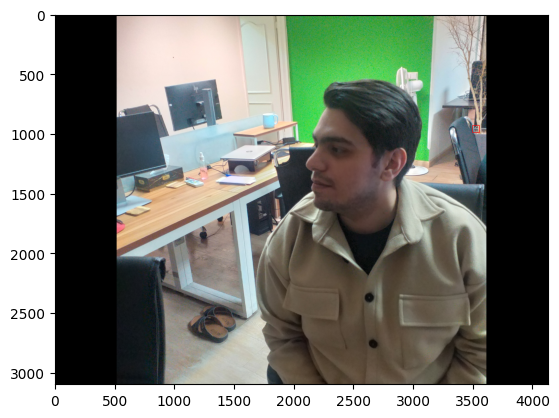

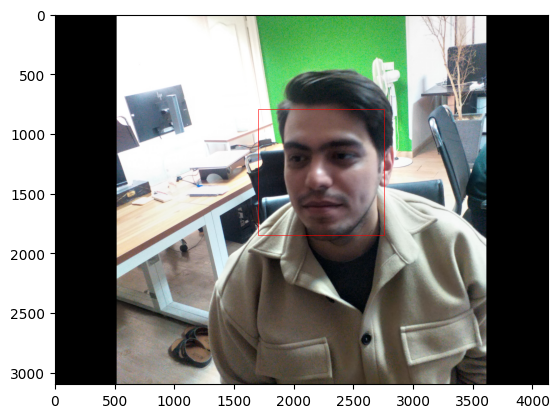

In [8]:
def plot_faces(pic:dict):
  embed = pic['embed']
  pic = pic['pic']

  plt.close('all')
  fig, ax = plt.subplots()
  ax.imshow(pic)
  for e in embed:
    area = e['facial_area']
    x, y, w, h = area["x"], area["y"], area["w"], area["h"]

    rec = patches.Rectangle((x, y), w, h, linewidth=0.4, edgecolor='red', facecolor='none')
    ax.add_patch(rec)
  plt.show()

# plot_faces(oscar_embed[0])
for i in didenegar_embed:
  plot_faces(i)

In [9]:
def two_by_two_distance(embeds:list, distance_function):
  out = np.zeros((len(embeds), len(embeds)))
  for i, e1 in enumerate(embeds):
    for j, e2 in enumerate(embeds):
      out[i, j] = distance_function(np.array(e1), np.array(e2))
  return out

# o = two_by_two_distance([i['embed'][0]['embedding'] for i in [*didenegar_embed, *zuckerberg_embed]], lambda x, y: np.linalg.norm(x-y))
o = two_by_two_distance([i['embed'][0]['embedding'] for i in [*didenegar_embed, *zuckerberg_embed]], lambda x, y: np.dot(x,y))
print(o)

[[1.         0.14865593 0.09993146 0.04830019 0.07705192 0.08191729]
 [0.14865593 1.         0.70100326 0.03785595 0.05912046 0.02761554]
 [0.09993146 0.70100326 1.         0.03085212 0.05459494 0.0244844 ]
 [0.04830019 0.03785595 0.03085212 1.         0.53596613 0.67222444]
 [0.07705192 0.05912046 0.05459494 0.53596613 1.         0.61618746]
 [0.08191729 0.02761554 0.0244844  0.67222444 0.61618746 1.        ]]


In [37]:
import cv2
vidcap = cv2.VideoCapture('/content/drive/MyDrive/didenegar/task-video.mp4')
# vidcap.set(cv2.CAP_PROP_POS_FRAMES, 10)
success,image = vidcap.read()
count = 0
while success and count<600:
  # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  image = image[:,:,-1::-1]
  # print('Read a new frame: ', success)
  count += 1
  # break
print(count)

600


(720, 1280, 3)

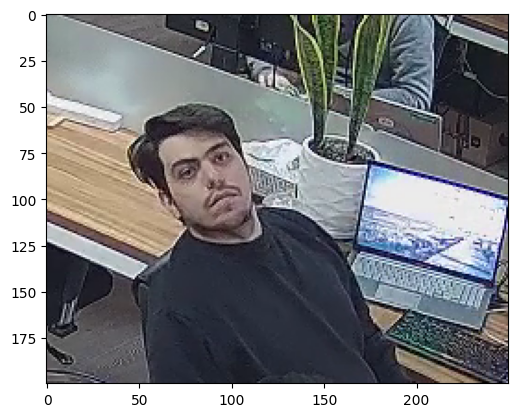

In [51]:
plt.imshow(image[100:300,750:1000,:])
image.shape

Failed!!! Model -> VGG-Face 	 backend -> opencv
Failed!!! Model -> VGG-Face 	 backend -> ssd
24-03-17 10:56:32 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> VGG-Face 	 backend -> dlib
1/1 [==============================] - 0s 65ms/step
found face! Model -> VGG-Face 	 backend -> mtcnn


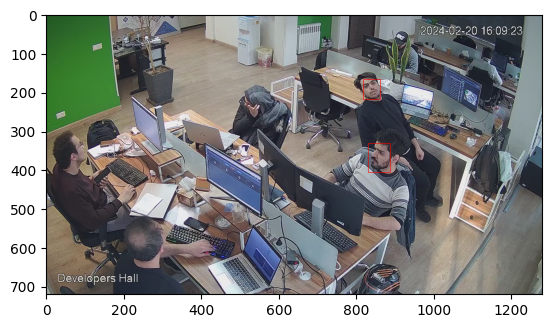

------------------------------
found face! Model -> VGG-Face 	 backend -> retinaface


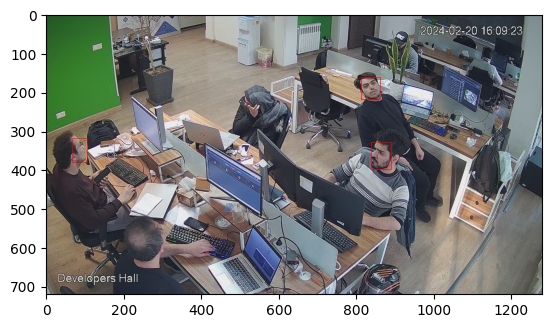

------------------------------
Failed!!! Model -> VGG-Face 	 backend -> mediapipe
Failed!!! Model -> VGG-Face 	 backend -> yolov8
Failed!!! Model -> VGG-Face 	 backend -> yunet
Failed!!! Model -> VGG-Face 	 backend -> fastmtcnn
Failed!!! Model -> Facenet 	 backend -> opencv
Failed!!! Model -> Facenet 	 backend -> ssd
24-03-17 10:56:52 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> Facenet 	 backend -> dlib
1/1 [==============================] - 0s 38ms/step
found face! Model -> Facenet 	 backend -> mtcnn


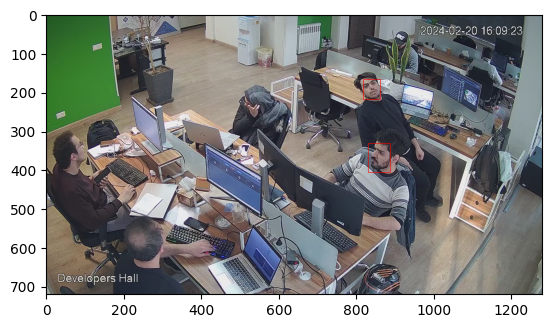

------------------------------
found face! Model -> Facenet 	 backend -> retinaface


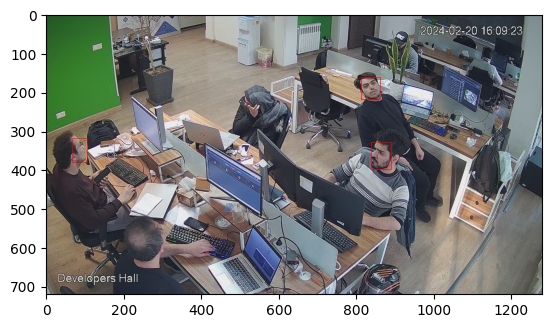

------------------------------
Failed!!! Model -> Facenet 	 backend -> mediapipe
Failed!!! Model -> Facenet 	 backend -> yolov8
Failed!!! Model -> Facenet 	 backend -> yunet
Failed!!! Model -> Facenet 	 backend -> fastmtcnn
Failed!!! Model -> Facenet512 	 backend -> opencv
Failed!!! Model -> Facenet512 	 backend -> ssd
24-03-17 10:57:08 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> Facenet512 	 backend -> dlib
1/1 [==============================] - 0s 37ms/step
found face! Model -> Facenet512 	 backend -> mtcnn


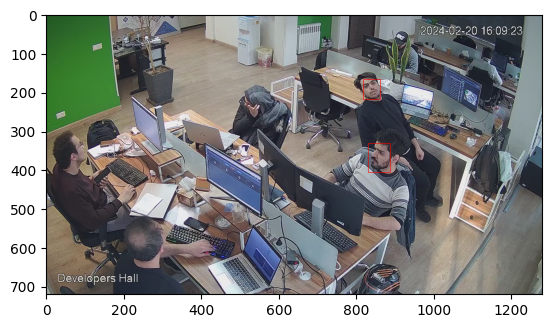

------------------------------
found face! Model -> Facenet512 	 backend -> retinaface


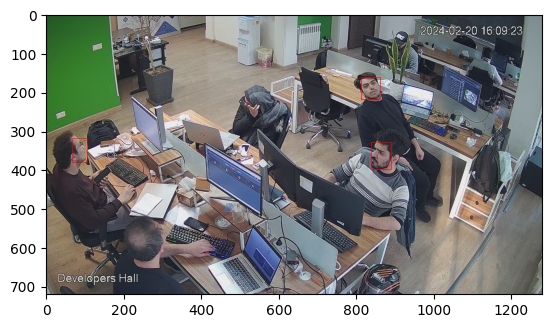

------------------------------
Failed!!! Model -> Facenet512 	 backend -> mediapipe
Failed!!! Model -> Facenet512 	 backend -> yolov8
Failed!!! Model -> Facenet512 	 backend -> yunet
Failed!!! Model -> Facenet512 	 backend -> fastmtcnn
Failed!!! Model -> OpenFace 	 backend -> opencv
Failed!!! Model -> OpenFace 	 backend -> ssd
24-03-17 10:57:25 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> OpenFace 	 backend -> dlib
1/1 [==============================] - 0s 37ms/step
found face! Model -> OpenFace 	 backend -> mtcnn


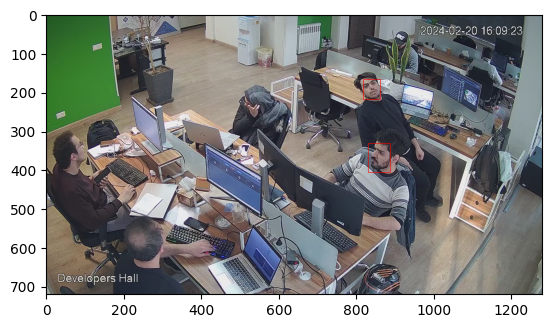

------------------------------
found face! Model -> OpenFace 	 backend -> retinaface


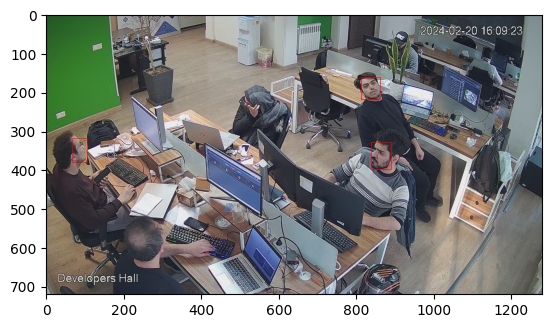

------------------------------
Failed!!! Model -> OpenFace 	 backend -> mediapipe
Failed!!! Model -> OpenFace 	 backend -> yolov8
Failed!!! Model -> OpenFace 	 backend -> yunet
Failed!!! Model -> OpenFace 	 backend -> fastmtcnn
Failed!!! Model -> DeepFace 	 backend -> opencv
Failed!!! Model -> DeepFace 	 backend -> ssd
Failed!!! Model -> DeepFace 	 backend -> dlib
Failed!!! Model -> DeepFace 	 backend -> mtcnn
Failed!!! Model -> DeepFace 	 backend -> retinaface
Failed!!! Model -> DeepFace 	 backend -> mediapipe
Failed!!! Model -> DeepFace 	 backend -> yolov8
Failed!!! Model -> DeepFace 	 backend -> yunet
Failed!!! Model -> DeepFace 	 backend -> fastmtcnn
Failed!!! Model -> DeepID 	 backend -> opencv
Failed!!! Model -> DeepID 	 backend -> ssd
24-03-17 10:57:41 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> DeepID 	 backend -> dlib
1/1 [==============================] - 0s 39ms/step
found face! Model -> DeepID 	 backend -> mtcnn


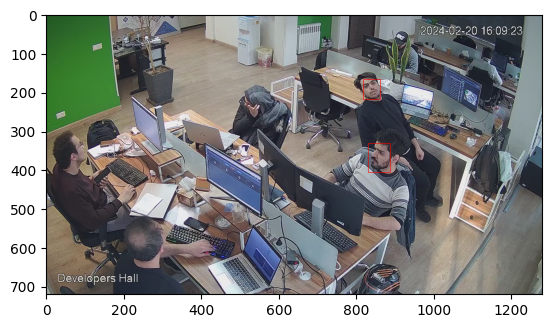

------------------------------
found face! Model -> DeepID 	 backend -> retinaface


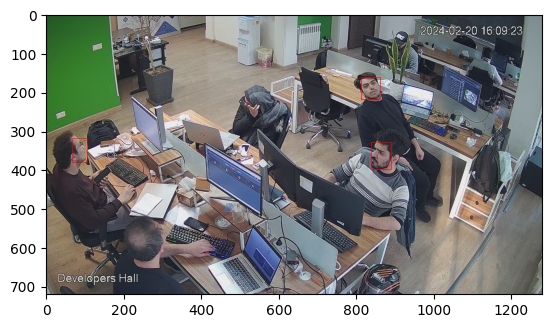

------------------------------
Failed!!! Model -> DeepID 	 backend -> mediapipe
Failed!!! Model -> DeepID 	 backend -> yolov8
Failed!!! Model -> DeepID 	 backend -> yunet
Failed!!! Model -> DeepID 	 backend -> fastmtcnn
Failed!!! Model -> ArcFace 	 backend -> opencv
Failed!!! Model -> ArcFace 	 backend -> ssd
24-03-17 10:57:56 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Failed!!! Model -> ArcFace 	 backend -> dlib
1/1 [==============================] - 0s 41ms/step
found face! Model -> ArcFace 	 backend -> mtcnn


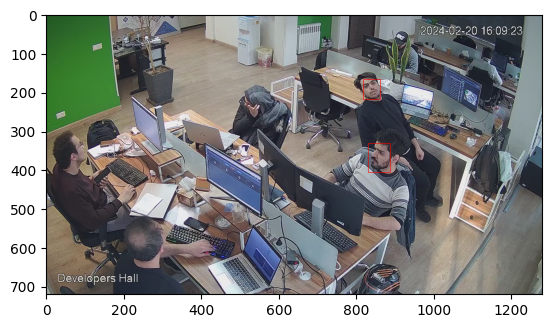

------------------------------
found face! Model -> ArcFace 	 backend -> retinaface


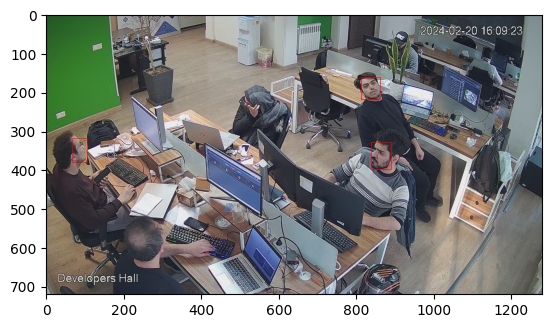

------------------------------
Failed!!! Model -> ArcFace 	 backend -> mediapipe
Failed!!! Model -> ArcFace 	 backend -> yolov8
Failed!!! Model -> ArcFace 	 backend -> yunet
Failed!!! Model -> ArcFace 	 backend -> fastmtcnn
24-03-17 10:58:12 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 backend -> opencv
24-03-17 10:58:13 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 backend -> ssd
24-03-17 10:58:13 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 backend -> dlib
24-03-17 10:58:13 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 backend -> mtcnn
24-03-17 10:58:13 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 backend -> retinaface
24-03-17 10:58:13 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded
Failed!!! Model -> Dlib 	 back

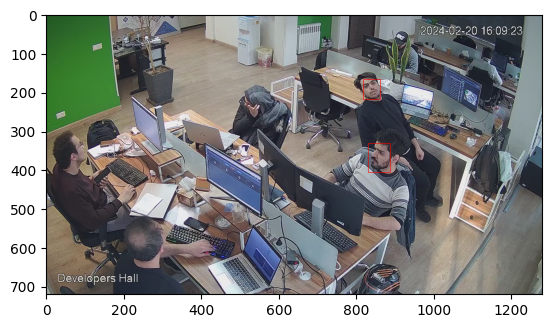

------------------------------
found face! Model -> SFace 	 backend -> retinaface


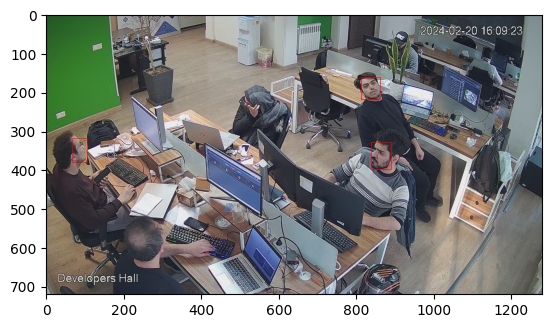

------------------------------
Failed!!! Model -> SFace 	 backend -> mediapipe
Failed!!! Model -> SFace 	 backend -> yolov8
Failed!!! Model -> SFace 	 backend -> yunet
Failed!!! Model -> SFace 	 backend -> fastmtcnn
Failed!!! Model -> GhostFaceNet 	 backend -> opencv
Failed!!! Model -> GhostFaceNet 	 backend -> ssd
Failed!!! Model -> GhostFaceNet 	 backend -> dlib
Failed!!! Model -> GhostFaceNet 	 backend -> mtcnn
Failed!!! Model -> GhostFaceNet 	 backend -> retinaface
Failed!!! Model -> GhostFaceNet 	 backend -> mediapipe
Failed!!! Model -> GhostFaceNet 	 backend -> yolov8
Failed!!! Model -> GhostFaceNet 	 backend -> yunet
Failed!!! Model -> GhostFaceNet 	 backend -> fastmtcnn


In [60]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
  "GhostFaceNet",
]

backends = [
  'opencv',
  'ssd',
  'dlib',
  'mtcnn',
  'retinaface',
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]
import time
log = []

for model in models:
  for backend in backends:
    def make_embed(path, url=False, raw=False, rotate=0):
      if raw:
        a = path
      elif url:
        a = np.array(PIL.Image.open(urllib.request.urlopen(path)).rotate(rotate))
      else:
        a = np.array(PIL.Image.open(path).rotate(rotate))

      return {"embed": DeepFace.represent(img_path = a, model_name=model, detector_backend=backend), "pic": a}

    try:
      # e = make_embed(image[100:300,750:1000,:], raw=True)
      st = time.time()
      e = make_embed(image, raw=True)
      elapsed = time.time()-st
      print(f"found face! Model -> {model} \t backend -> {backend}")
      plot_faces(e)
      print("-"*30)
      log.append({
          "elapsed": elapsed,
          "model": model,
          "backend": backend
      })
    except:
      print(f"Failed!!! Model -> {model} \t backend -> {backend}")
      pass

In [61]:
log

[{'elapsed': 5.167903661727905, 'model': 'VGG-Face', 'backend': 'mtcnn'},
 {'elapsed': 12.391022205352783, 'model': 'VGG-Face', 'backend': 'retinaface'},
 {'elapsed': 2.564177989959717, 'model': 'Facenet', 'backend': 'mtcnn'},
 {'elapsed': 12.226619958877563, 'model': 'Facenet', 'backend': 'retinaface'},
 {'elapsed': 2.7955875396728516, 'model': 'Facenet512', 'backend': 'mtcnn'},
 {'elapsed': 12.092751026153564,
  'model': 'Facenet512',
  'backend': 'retinaface'},
 {'elapsed': 2.3655996322631836, 'model': 'OpenFace', 'backend': 'mtcnn'},
 {'elapsed': 11.35520076751709, 'model': 'OpenFace', 'backend': 'retinaface'},
 {'elapsed': 2.1746866703033447, 'model': 'DeepID', 'backend': 'mtcnn'},
 {'elapsed': 11.085002183914185, 'model': 'DeepID', 'backend': 'retinaface'},
 {'elapsed': 4.219794750213623, 'model': 'ArcFace', 'backend': 'mtcnn'},
 {'elapsed': 11.34824013710022, 'model': 'ArcFace', 'backend': 'retinaface'},
 {'elapsed': 3.0918128490448, 'model': 'SFace', 'backend': 'mtcnn'},
 {'ela